In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
file_name = 'down_buffer.csv'
df = pd.read_csv(file_name)
print(df.shape)
df.head()

(656, 10)


,0,1,2,3,4,5,6,7,8,9
0,299.0,298.0,297.0,298.0,300.0,305.0,307.0,310.0,316.0,316.0
1,298.0,297.0,298.0,300.0,305.0,307.0,310.0,316.0,316.0,314.0
2,297.0,298.0,300.0,305.0,307.0,310.0,316.0,316.0,314.0,318.0
3,298.0,300.0,305.0,307.0,310.0,316.0,316.0,314.0,318.0,319.0
4,300.0,305.0,307.0,310.0,316.0,316.0,314.0,318.0,319.0,318.0


In [219]:
df_diff = df.apply(lambda x: x - x[9], axis=1)
display(df_diff)

/tmp/ipykernel_31380/3226161005.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_diff = df.apply(lambda x: x - x[9], axis=1)


,0,1,2,3,4,5,6,7,8,9
0,-17.0,-18.0,-19.0,-18.0,-16.0,-11.0,-9.0,-6.0,0.0,0.0
1,-16.0,-17.0,-16.0,-14.0,-9.0,-7.0,-4.0,2.0,2.0,0.0
2,-21.0,-20.0,-18.0,-13.0,-11.0,-8.0,-2.0,-2.0,-4.0,0.0
3,-21.0,-19.0,-14.0,-12.0,-9.0,-3.0,-3.0,-5.0,-1.0,0.0
4,-18.0,-13.0,-11.0,-8.0,-2.0,-2.0,-4.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
651,-25.0,-15.0,-14.0,-5.0,-1.0,3.0,2.0,1.0,3.0,0.0
652,-16.0,-15.0,-6.0,-2.0,2.0,1.0,0.0,2.0,-1.0,0.0
653,-15.0,-6.0,-2.0,2.0,1.0,0.0,2.0,-1.0,0.0,0.0
654,-7.0,-3.0,1.0,0.0,-1.0,1.0,-2.0,-1.0,-1.0,0.0


<Axes: >

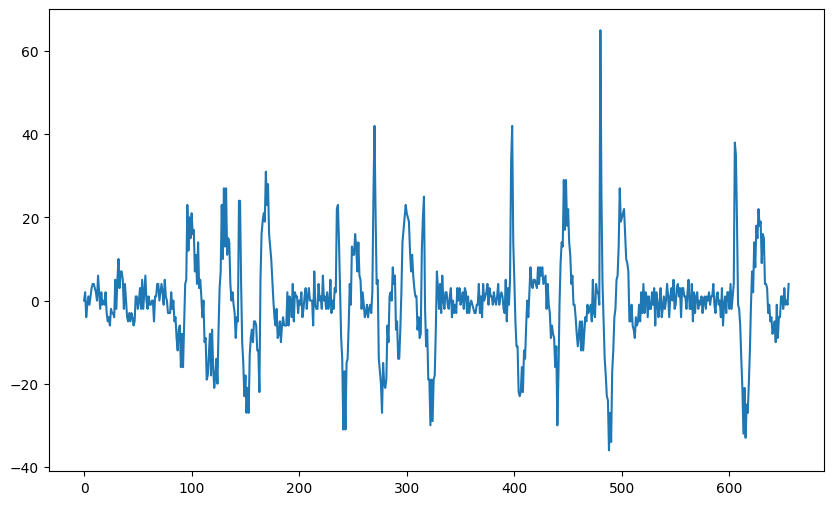

In [220]:
df_diff['8'].plot(figsize=(10, 6))

<Axes: >

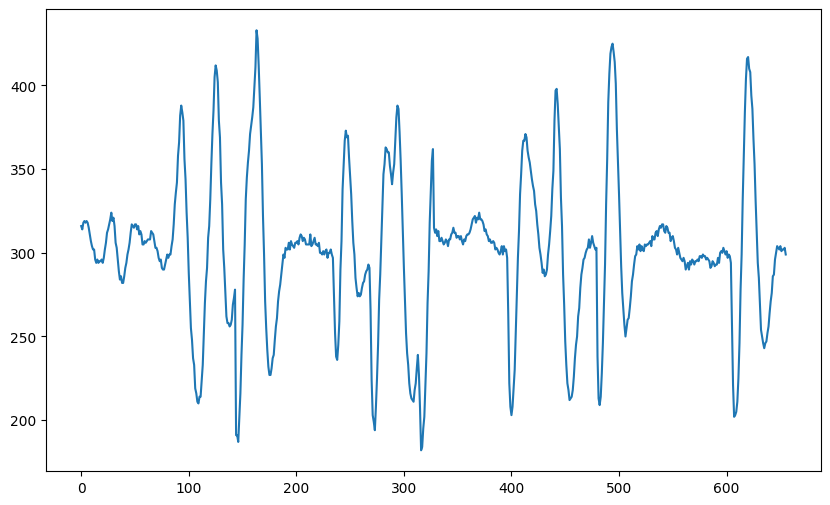

In [221]:
df['9'].plot(figsize=(10, 6))

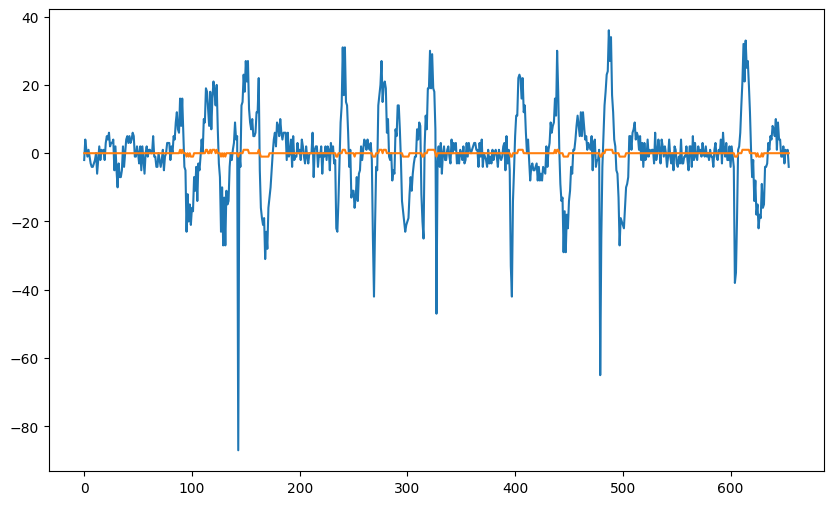

In [222]:
res = df['9'].dropna().values
new_res = np.zeros_like(res)
new_res2 = np.zeros_like(res)
new_res[0] = res[0]
for i in range(1, len(res)):
    new_res[i] = 0.5 * new_res[i - 1] + 0.5 * res[i]
    new_res2[i] = res[i] - new_res[i]
    
new_res2 = res[1:] - res[:-1]
    
plt.figure(figsize=(10, 6))
# plt.plot(res)
# plt.plot(new_res)
plt.plot(new_res2)

threshold = 15
new_res3 = np.zeros_like(new_res2)
for i in range(1, len(new_res2)):
    new_res3[i] = 1 if new_res2[i] > threshold else -1 if new_res2[i] < -threshold else 0
plt.plot(new_res3)

In [223]:
df_diff.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,0,1,2,3,4,5,6,7,8,9
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.0
mean,0.371951,0.207317,0.022866,-0.082317,-0.163110,-0.198171,-0.103659,-0.044207,-0.092988,0.0
std,67.095753,63.278999,58.506066,52.807754,46.155521,38.622705,30.406381,21.278227,11.073063,0.0
min,-205.000000,-193.000000,-179.000000,-162.000000,-144.000000,-121.000000,-97.000000,-63.000000,-36.000000,0.0
10%,-86.000000,-79.500000,-74.000000,-67.000000,-56.000000,-47.500000,-36.500000,-25.000000,-13.000000,0.0
25%,-21.000000,-19.250000,-19.250000,-18.000000,-16.000000,-14.000000,-11.000000,-8.000000,-4.250000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,22.000000,21.000000,18.000000,16.000000,12.250000,10.000000,8.000000,5.250000,4.000000,0.0
90%,89.000000,85.500000,82.500000,74.500000,69.000000,55.500000,40.000000,27.500000,14.000000,0.0
max,186.000000,173.000000,157.000000,141.000000,122.000000,101.000000,94.000000,90.000000,65.000000,0.0


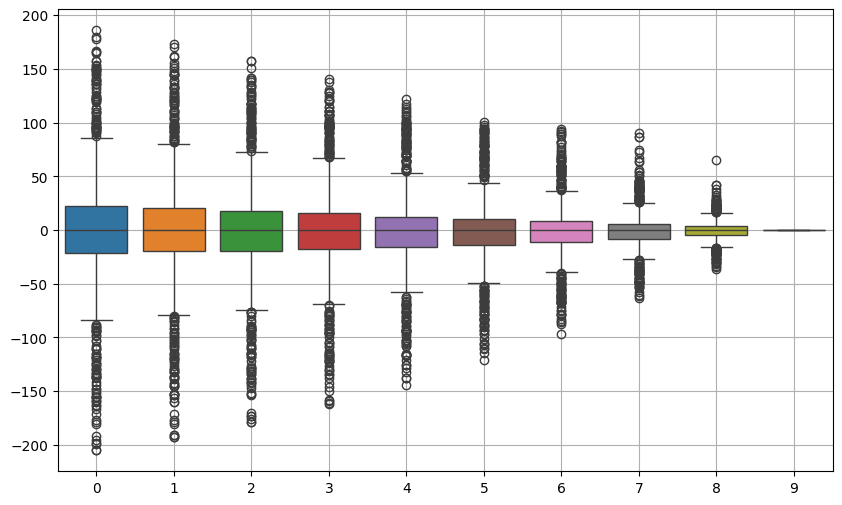

In [224]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the distribution of each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diff, showfliers=True)
plt.grid()

In [225]:
display(df_diff.sort_values(by='8', ascending=False))

,0,1,2,3,4,5,6,7,8,9
480,65.0,70.0,65.0,68.0,72.0,68.0,66.0,64.0,65.0,0.0
398,77.0,79.0,82.0,77.0,82.0,79.0,80.0,75.0,42.0,0.0
270,55.0,58.0,59.0,63.0,65.0,66.0,69.0,67.0,42.0,0.0
605,44.0,47.0,45.0,43.0,45.0,41.0,43.0,42.0,38.0,0.0
606,82.0,80.0,78.0,80.0,76.0,78.0,77.0,73.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...
241,12.0,9.0,7.0,-15.0,-38.0,-52.0,-54.0,-45.0,-31.0,0.0
613,16.0,-22.0,-57.0,-76.0,-75.0,-73.0,-67.0,-53.0,-32.0,0.0
615,-111.0,-130.0,-129.0,-127.0,-121.0,-107.0,-86.0,-54.0,-33.0,0.0
490,-177.0,-181.0,-176.0,-162.0,-144.0,-121.0,-97.0,-61.0,-34.0,0.0
